In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import glob
import umap

C:\Users\Seppe\anaconda3\envs\deep-learning\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Seppe\anaconda3\envs\deep-learning\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Seppe\anaconda3\envs\deep-learning\lib\site-packages\umap\distanc

In [13]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [14]:
image_path = "original-processed"

In [38]:
images = []
for img in glob.iglob(f"{image_path}/*.jpg"):
    pil_image = expand2square(Image.open(img), (128,128,128)).resize((720, 720))
    image = np.array(pil_image)
    images.append(image)

In [39]:
images[0].shape

(720, 720, 3)

In [40]:
images = np.array(images)

In [41]:
images = images[:, :, :, 0]

In [42]:
images = images.reshape((images.shape[0],images.shape[1]*images.shape[2]))

In [43]:
images.shape

(2194, 518400)

In [44]:
reducer = umap.UMAP()

In [45]:
embedding = reducer.fit_transform(images)
embedding.shape

(2194, 2)

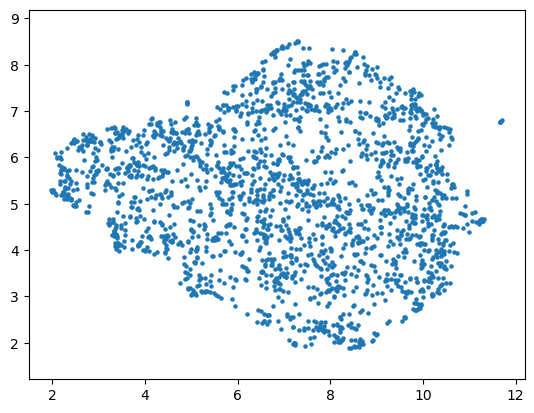

In [47]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')

In [48]:
from io import BytesIO
from PIL import Image
import base64

def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((720, 720), Image.Resampling.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [50]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

Loading BokehJS ...

In [52]:
digits_df = pd.DataFrame(embedding, columns=('x', 'y'))
digits_df['image'] = list(map(embeddable_image, images))

datasource = ColumnDataSource(digits_df)

plot_figure = figure(
    width=600,
    height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div><img src='@image' style='float: left; margin: 5px 5px 5px 5px'/></div>
    <div><span style='font-size: 16px; color: #224499'>Digit:</span></div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)